In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from poly_reg import *

In [41]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(precision=3, suppress=True)
# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
x = np.linspace(-5, 5, 100)
y = x**2 +  np.random.normal(loc=0, scale=3, size=len(x))

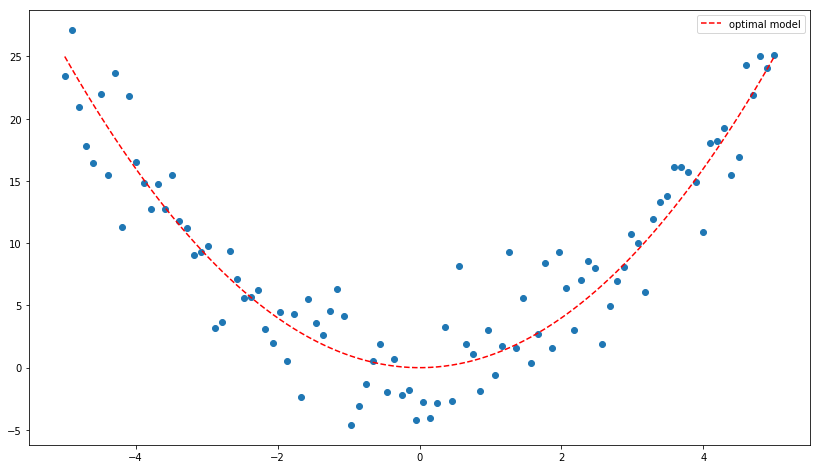

In [50]:
plt.scatter(x, y)
plt.plot(x, x**2, linestyle='--', color='red', label='optimal model')
plt.legend();

In [44]:
data = np.column_stack((np.ones_like(x), x ,x**2))
data

array([[ 1.   , -5.   , 25.   ],
       [ 1.   , -4.899, 24.   ],
       [ 1.   , -4.798, 23.021],
       [ 1.   , -4.697, 22.062],
       [ 1.   , -4.596, 21.123],
       [ 1.   , -4.495, 20.205],
       [ 1.   , -4.394, 19.307],
       [ 1.   , -4.293, 18.429],
       [ 1.   , -4.192, 17.572],
       [ 1.   , -4.091, 16.736],
       [ 1.   , -3.99 , 15.919],
       [ 1.   , -3.889, 15.123],
       [ 1.   , -3.788, 14.348],
       [ 1.   , -3.687, 13.593],
       [ 1.   , -3.586, 12.858],
       [ 1.   , -3.485, 12.144],
       [ 1.   , -3.384, 11.45 ],
       [ 1.   , -3.283, 10.777],
       [ 1.   , -3.182, 10.124],
       [ 1.   , -3.081,  9.491],
       [ 1.   , -2.98 ,  8.879],
       [ 1.   , -2.879,  8.287],
       [ 1.   , -2.778,  7.716],
       [ 1.   , -2.677,  7.165],
       [ 1.   , -2.576,  6.635],
       [ 1.   , -2.475,  6.124],
       [ 1.   , -2.374,  5.635],
       [ 1.   , -2.273,  5.165],
       [ 1.   , -2.172,  4.716],
       [ 1.   , -2.071,  4.288],
       [ 1

# Univariate Polynomial Regression
Simple polynomial regression is a regression model with a single explanatory variable and a single target value.

$$
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

## Gradient Descent 

Our task is to find the best possible polynomial that explains all the points in our dataset. We start by guessing initial values for the regression parameters $\theta$ and update the values using gradient descent. 

The objective of polynomial regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
$$

where the subscript $i$ is the i'th datapoint in the dataset.


$\theta_j$ are parameters of your model and by changing those values accordingly (using **gradient descent**) you will be able to lower the cost function $J(\theta)$:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i^j
$$

In polynomial regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [47]:
theta = np.random.random(data.shape[1])
theta

array([0.496, 0.081, 0.22 ])